In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# Save all the Print Statements in a Log file.
log_file = open("summary.log", "w")
sys.stdout = log_file

In [3]:
# Load MNIST Data
print('\nLoading MNIST Data...')
mnist = fetch_openml('mnist_784')

C:\Users\Siva Kumar\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X = np.array(mnist.data)
y = np.array(mnist.target)
# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

In [5]:
# Pickle the Classifier for Future Use
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
print('\nTraining the Classifier...')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train, y_train)

SVC(gamma=0.1, kernel='poly')

In [6]:
# Save the trained classifier
with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)

# Load the trained classifier
with open('MNIST_SVM.pickle', 'rb') as f:
    clf = pickle.load(f)

# Calculating Accuracy of trained Classifier
acc = clf.score(X_test, y_test)

# Making Predictions on Validation Data
y_pred = clf.predict(X_test)

# Calculating Accuracy of Predictions
accuracy = accuracy_score(y_test, y_pred)

# Creating Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

print('\nSVM Trained Classifier Accuracy:', acc)
print('\nAccuracy of Classifier on Validation Images:', accuracy)
print('\nConfusion Matrix:\n', conf_mat)

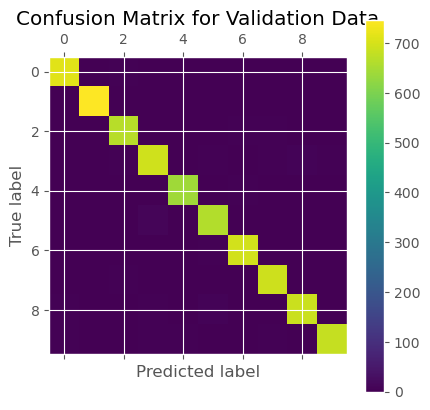

In [7]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [8]:
# Making Predictions on Test Input Images
test_labels_pred = clf.predict(X_test)

# Calculating Accuracy of Trained Classifier on Test Data
acc = accuracy_score(y_test, test_labels_pred)

# Creating Confusion Matrix for Test Data
conf_mat_test = confusion_matrix(y_test, test_labels_pred)

print('\nAccuracy of Classifier on Test Images:', acc)
print('\nConfusion Matrix for Test Data:\n', conf_mat_test)

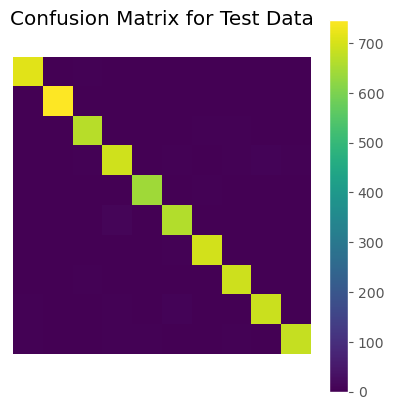

In [9]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

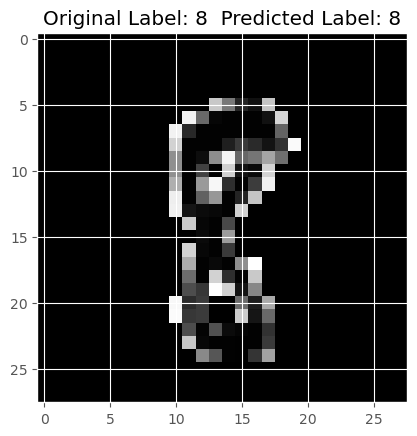

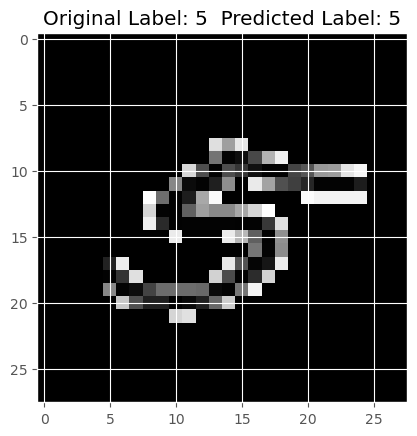

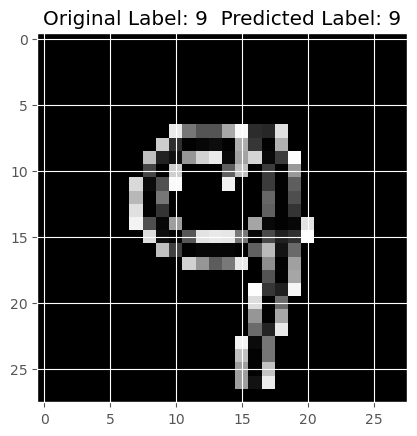

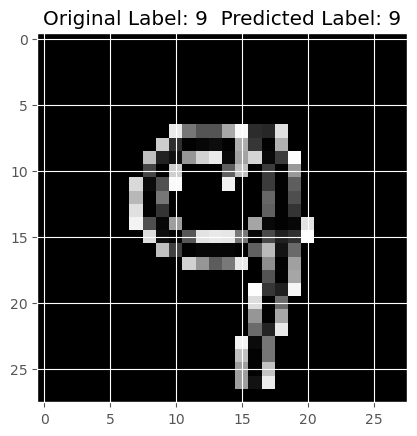

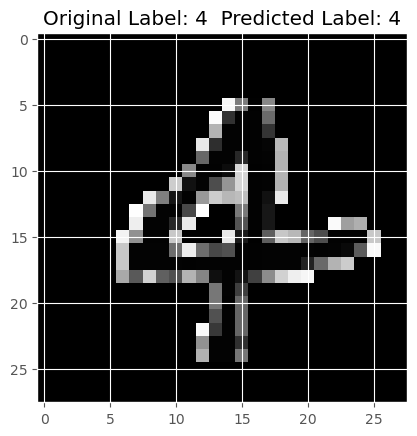

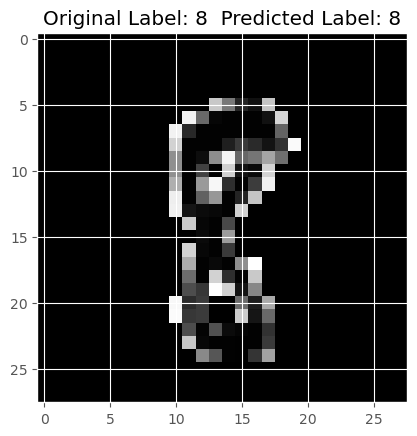

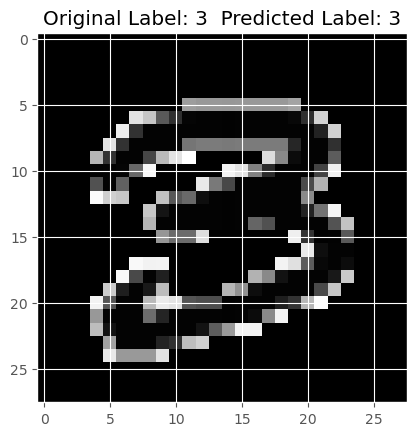

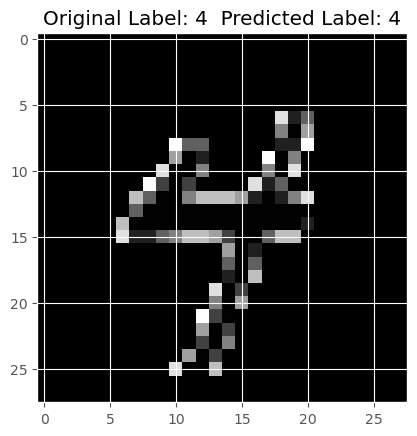

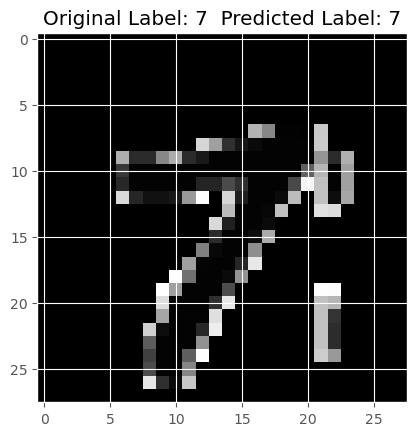

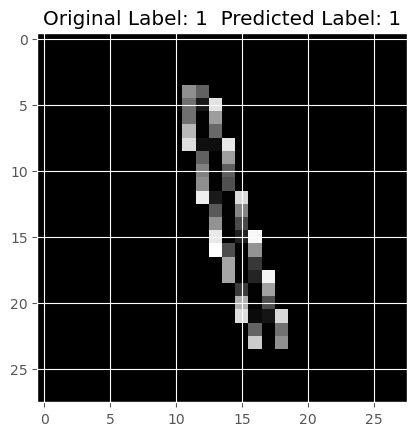

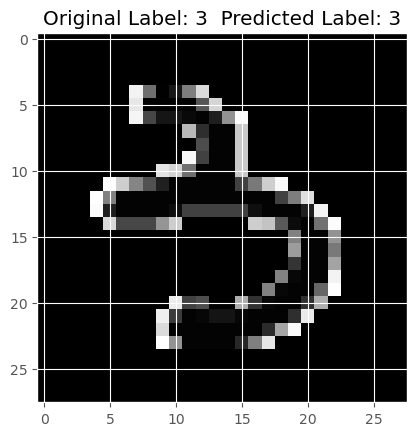

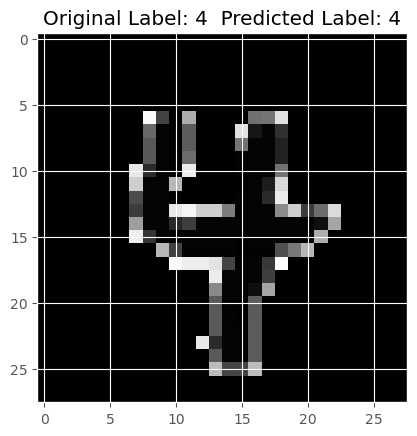

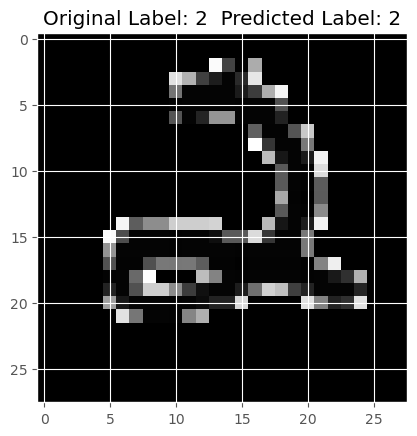

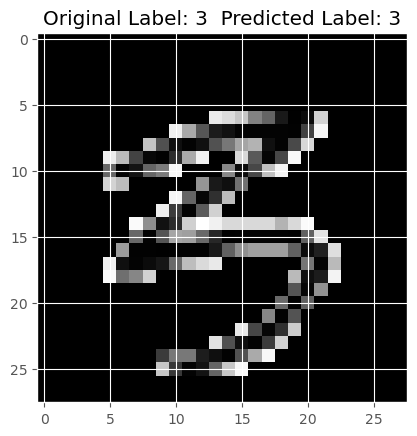

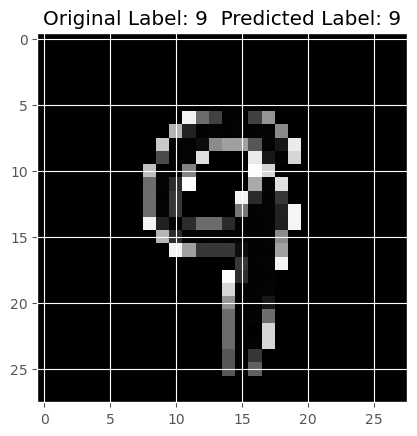

In [10]:
sys.stdout = sys.__stdout__
log_file.close()

# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1, 40, 15)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()